In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\vishal parmar\Downloads\Active_Users.csv')

In [3]:
data.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [4]:
weekly_counts = {}

In [5]:
for week in data.columns:
    weekly_counts[week] = data[week].notna().sum()

In [6]:
weekly_counts_df = pd.DataFrame(list(weekly_counts.items()), columns=['Week', 'Active_Users'])

In [7]:
weekly_counts_df['Week'] = weekly_counts_df['Week'].str.extract('(\d+)').astype(int)
weekly_counts_df = weekly_counts_df.sort_values('Week')

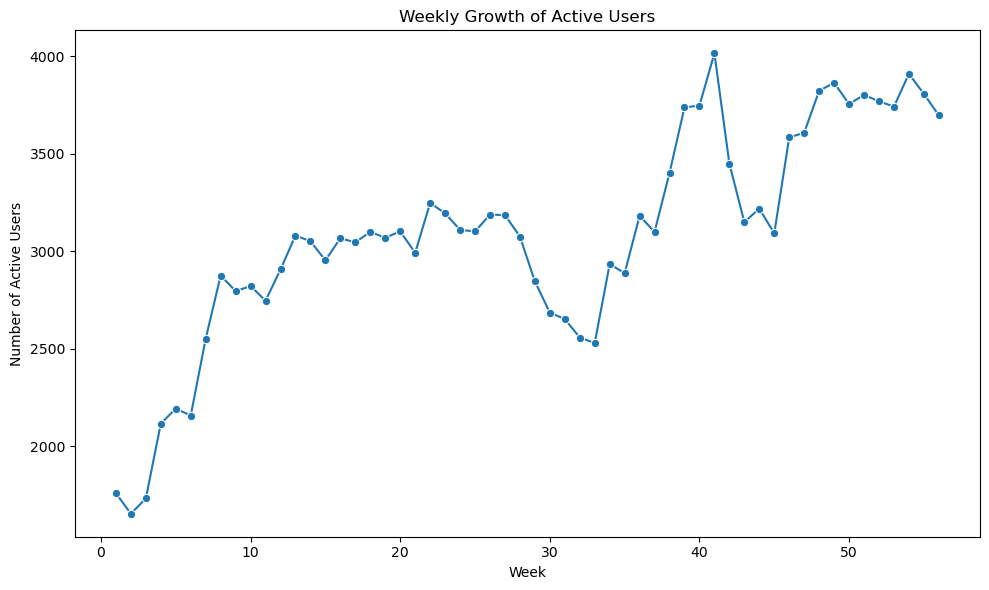

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Week', y='Active_Users', data=weekly_counts_df, marker='o')
plt.title('Weekly Growth of Active Users')
plt.xlabel('Week')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
def growth_accounting(data):
    weekly_growth_metrics = {
        'Week': [],
        'New Users': [],
        'Resurrected Users': [],
        'Churned Users': [],
        'Retained Users': [],
        'Quick Ratio': []
    }
    
    for i in range(data.shape[1]):
        current_week = set(data.iloc[:, i].dropna())
        previous_week = set(data.iloc[:, i-1].dropna())
        previous_weeks = set(data.iloc[:, :i-1].stack().dropna().unique())
        
        new_users = current_week - previous_week
        resurrected_users = current_week & previous_weeks - previous_week
        churned_users = previous_week - current_week
        retained_users = current_week & previous_week
        quick_ratio = (len(new_users) + len(resurrected_users)) / len(churned_users) if len(churned_users) != 0 else float('inf')
        
        weekly_growth_metrics['Week'].append(data.columns[i])
        weekly_growth_metrics['New Users'].append(len(new_users))
        weekly_growth_metrics['Resurrected Users'].append(len(resurrected_users))
        weekly_growth_metrics['Churned Users'].append(len(churned_users))
        weekly_growth_metrics['Retained Users'].append(len(retained_users))
        weekly_growth_metrics['Quick Ratio'].append(quick_ratio)
    
    return pd.DataFrame(weekly_growth_metrics)

In [10]:
growth_metrics_df = growth_accounting(data)

In [11]:
growth_metrics_df

,Week,New Users,Resurrected Users,Churned Users,Retained Users,Quick Ratio
0,w1,1746,1746,3683,13,0.948140
1,w2,723,0,828,931,0.873188
2,w3,732,87,654,1000,1.252294
3,w4,947,225,563,1169,2.081705
4,w5,799,125,722,1394,1.279778
5,w6,676,187,714,1479,1.208683
6,w7,1062,202,668,1487,1.892216
7,w8,1198,193,872,1677,1.595183
8,w9,956,237,1036,1839,1.151544
9,w10,883,262,857,1938,1.336056


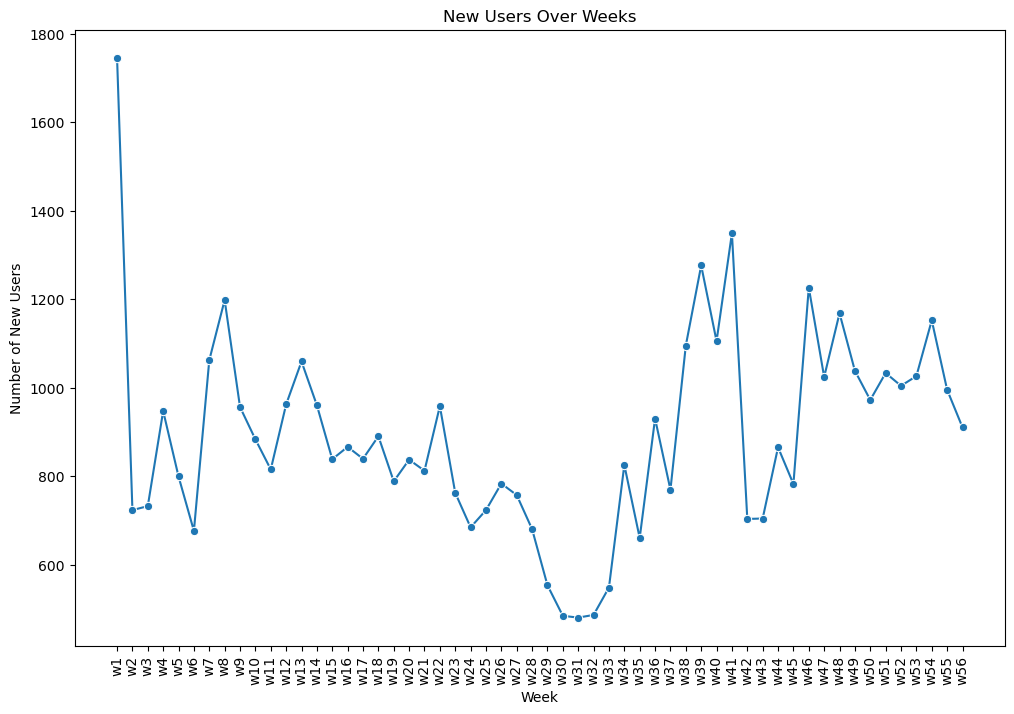

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Week', y='New Users', data=growth_metrics_df, marker='o')
plt.title('New Users Over Weeks')
plt.xlabel('Week')
plt.ylabel('Number of New Users')
plt.xticks(rotation=90)
plt.show()

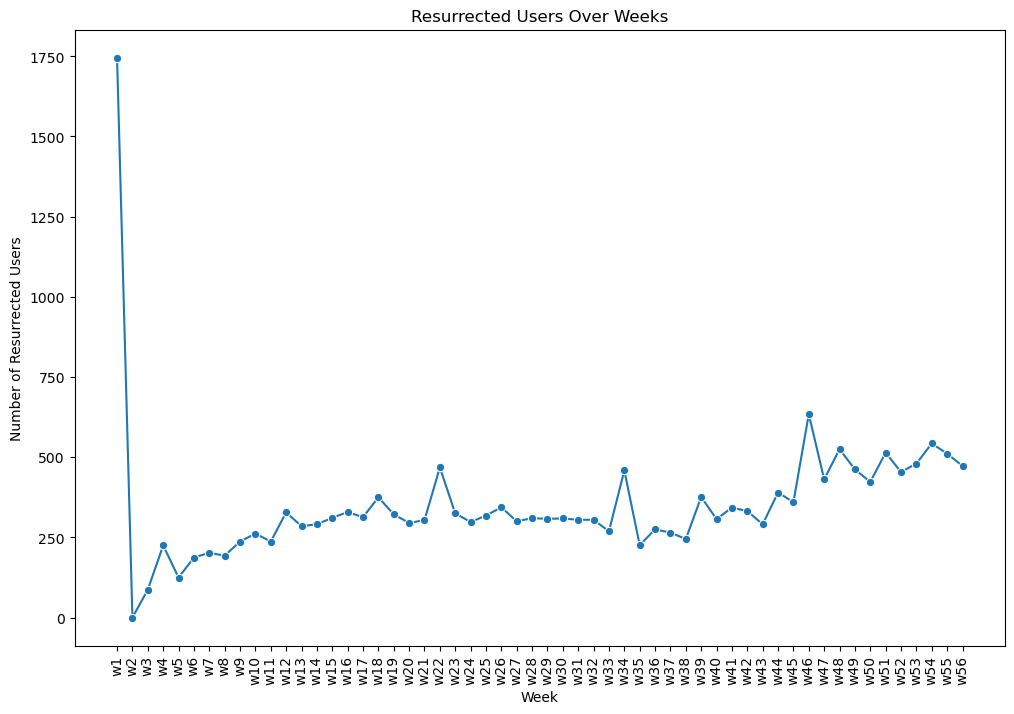

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Week', y='Resurrected Users', data=growth_metrics_df, marker='o')
plt.title('Resurrected Users Over Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Resurrected Users')
plt.xticks(rotation=90)
plt.show()

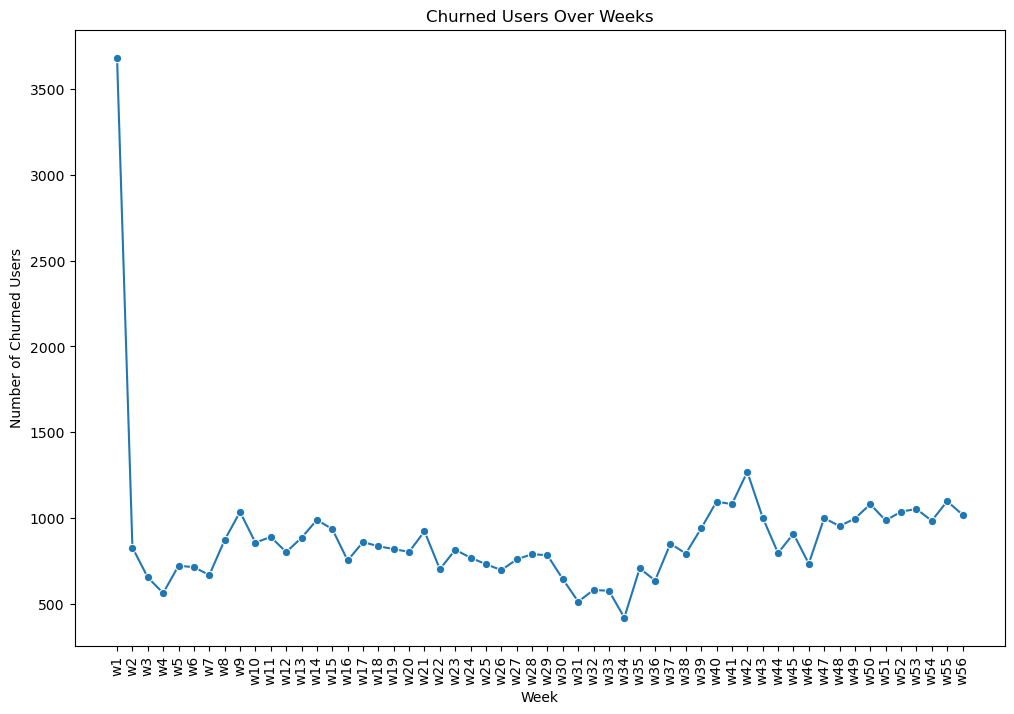

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Week', y='Churned Users', data=growth_metrics_df, marker='o')
plt.title('Churned Users Over Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Churned Users')
plt.xticks(rotation=90)
plt.show()

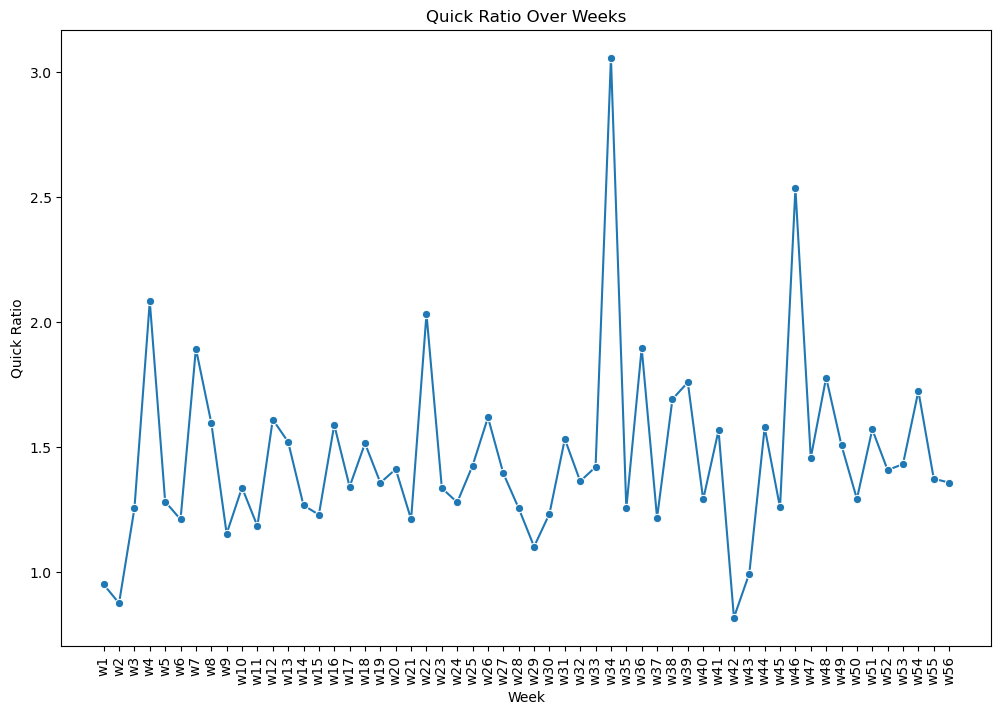

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Week', y='Quick Ratio', data=growth_metrics_df, marker='o')
plt.title('Quick Ratio Over Weeks')
plt.xlabel('Week')
plt.ylabel('Quick Ratio')
plt.xticks(rotation=90)
plt.show()